#HW7 Planning and Learning


##environment
The grid world size is 10*5 like following, black color and edge represent walls, every transition get reward = -10.
After 200 episodes, the part of wall will collapse.

parameters:

discounted rate = 1.0

learning rate = 0.1

epsilon = 0.001

total_episode = 1000

planning_times = 5

In [ ]:
GAMMA = 1.0
ALPHA = 0.1
EPSILON = 0.001
WORLD_SIZE = [5,10]
S0 = [0, 0]
ST = [4, 0]
max_episode=1000
planning_times = 5
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

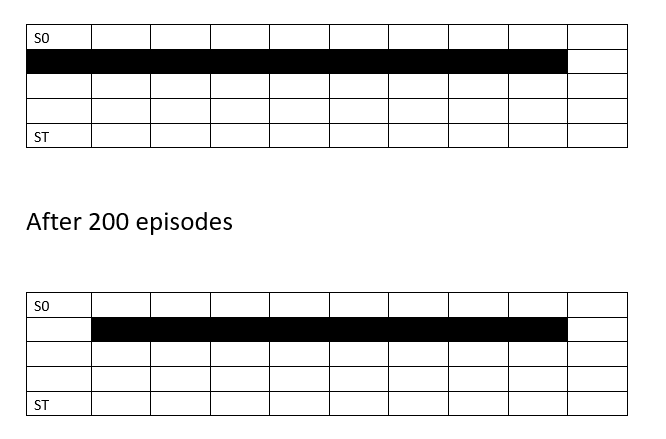

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from collections import defaultdict
import random
from tqdm import tqdm



In [ ]:
# Environment
def step(state, action, epi):
  WALL = [[1,i]for i in range(9)]
  if epi > max_episode*0.2:
      WALL =  [[1,i]for i in range(1,9)]
  state_n = np.array(state) + np.array(action)
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  state_n = state if state_n in WALL else state_n
  reward = -10
  return [state_n, reward]

In [ ]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [ ]:
def dyna_q():
    qtable = np.zeros([5, 10, 4])
    model = defaultdict(dict)
    returns = []
    for episode in range(max_episode):
      #### your code here ######
      epsilon = EPSILON
      state = S0
      G = 0
      while state != ST:
        action = chooseAction(state,qtable,epsilon)
        state_n, reward = step(state, ACTIONS[action], episode)
        qtable[state[0], state[1], action] += ALPHA * (reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])
        model[tuple(state)][action]=[reward,tuple(state_n)]
        for k in range(planning_times):
          s= random.choice(list(model))
          a= random.choice(list(model[tuple(s)])) #a要隨機選
          r,s_prime=model[tuple(s)][a]
          qtable[s[0], s[1], a] += ALPHA * (r + GAMMA * np.max(qtable[s_prime[0], s_prime[1]]) - qtable[s[0], s[1], a])
        state = state_n
        state = state_n
        G += reward
      returns.append(G)
      ##########################

    return returns

In [ ]:
# use kappa = 0.1
def dyna_q_plus():
    qtable = np.zeros([5, 10, 4])
    model = defaultdict(dict)
    returns = []
    t_table = np.zeros([5, 10, 4])
    t = 0
    kappa=0.1
    for episode in range(max_episode):
        #### your code here ####
        epsilon = EPSILON
        state = S0
        G = 0
        while state != ST:
            action = chooseAction(state,qtable,epsilon)
            state_n, reward = step(state, ACTIONS[action], episode)
            qtable[state[0], state[1], action] += ALPHA * (reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])    
            t_table[state[0],state[1],action] = t
            model[tuple(state)][action] = [reward,tuple(state_n)]
            for k in range(planning_times):
              s= random.choice(list(model))
              a= rd.randint(len(ACTIONS))
              if a not in model[s].keys():
                r=0
                s_prime=s
                t_table[s_prime[0],s_prime[1],a]=0 
              else:
                r,s_prime=model[tuple(s)][a]
              tau = t - t_table[s_prime[0],s_prime[1],a]                
              r += kappa * (tau ** 0.5)
              qtable[s[0], s[1], a] += ALPHA * (r + GAMMA * np.max(qtable[s_prime[0], s_prime[1]]) - qtable[s[0], s[1], a])

            state = state_n
            G += reward
            t += 1
        returns.append(G)
        ##########################

    return returns

In [ ]:
# use kappa = 0.1
def dyna_q_plus_every_episode():
    qtable = np.zeros([5, 10, 4])
    model = defaultdict(dict)
    returns = []
    t_table = np.zeros([5, 10, 4])
    t = 0
    kappa=0.1
    for episode in range(max_episode):
      #### your code here ####
      epsilon = EPSILON
      state = S0
      G = 0
      t=0  
      t_table = np.zeros([5, 10, 4]) 
      while state != ST:
        action = chooseAction(state,qtable,epsilon)
        state_n, reward = step(state, ACTIONS[action], episode)
        qtable[state[0], state[1], action] += ALPHA * (reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])    
        t_table[state[0],state[1],action] = t
        model[tuple(state)][action]=[reward,tuple(state_n)]
        for k in range(planning_times):
          s= random.choice(list(model))
          a= rd.randint(len(ACTIONS))
          if a not in model[s].keys():
            r=0
            s_prime=s
            t_table[s_prime[0],s_prime[1],a]=0 
          else:
            r,s_prime=model[tuple(s)][a]
          tau = t - t_table[s_prime[0],s_prime[1],a]                
          r += kappa * (tau ** 0.5)
          qtable[s[0], s[1], a] += ALPHA * (r + GAMMA * np.max(qtable[s_prime[0], s_prime[1]]) - qtable[s[0], s[1], a])

        state = state_n
        G += reward
        t += 1
      returns.append(G)
      ##########################

    return returns

In [ ]:

def q_learning():
    qtable = np.zeros([5, 10, 4])
    returns = []
    for episode in range(max_episode):
        epsilon = EPSILON
        state = S0
        G = 0
        while state != ST:
            action = chooseAction(state, qtable, epsilon)
            state_n, reward = step(state, ACTIONS[action], episode)

            qtable[state[0], state[1], action] += ALPHA * (
                        reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])

            state = state_n
            G += reward
        returns.append(G)

    return returns

dyna_q
dyna_q_plus(tau restart every episode)
q_learning


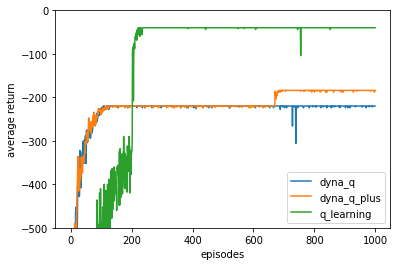

In [ ]:
simulation = 5
plt.plot(np.average([dyna_q() for i in range(simulation )],axis=0),label='dyna_q')
print('dyna_q')
plt.plot(np.average([dyna_q_plus_every_episode() for i in range(simulation )],axis=0),label='dyna_q_plus')
print('dyna_q_plus(tau restart every episode)')
plt.plot(np.average([q_learning() for i in range(simulation )],axis=0),label='q_learning')
print('q_learning')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

# Experiment 1 (20%)
In dyna-Q+ algorithm line20 ,$\tau$ need to restart in every episode or restart in every simulation?please do the experiment and explain your answer.


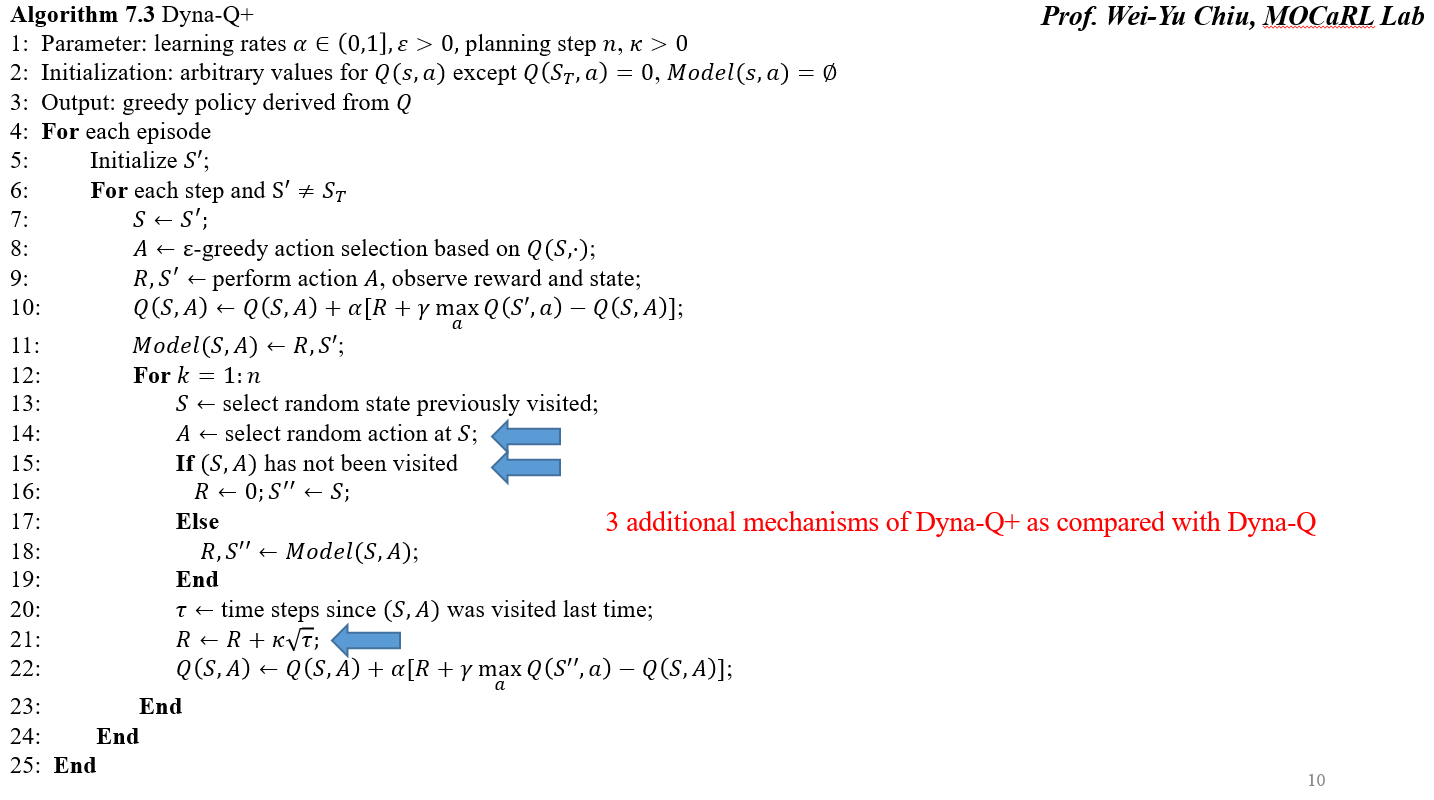

根據實驗結果圖表顯示，若在每次episode就重置τ，則 dyna-Q+ 的returns曲線在400~600左右episodes時不會像每次simulation就重置τ升起，這是因為一次episode走過的軌跡數不夠多，演算法難以估測有哪些狀態動作配對是明顯許久未拜訪過的，因此那些真正許久未拜訪的狀態無法有效地透過kappa來提升reward，造成agent在學習時會沒有發現環境已發生改變而改善動作選擇策略

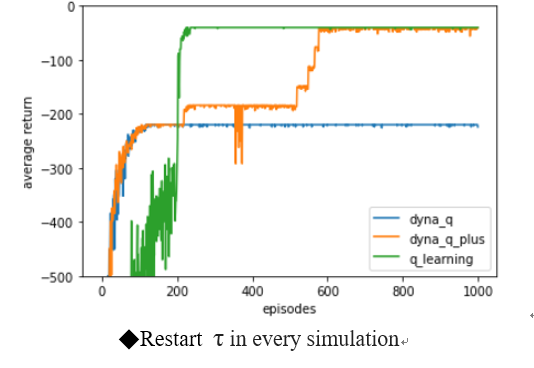

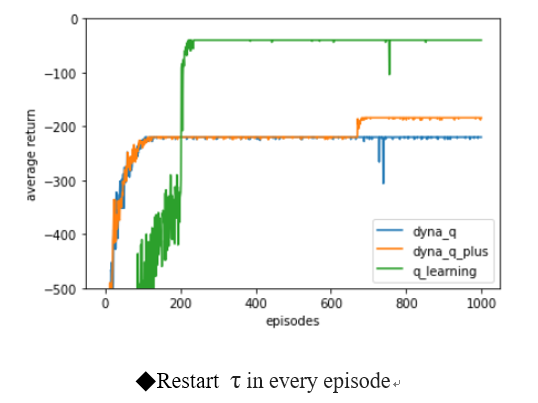

#Result(60%)
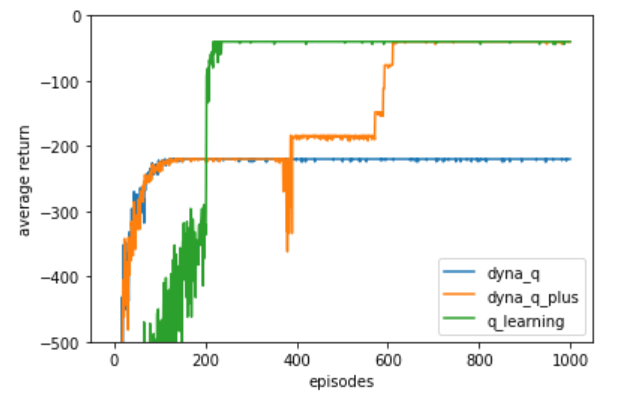

dyna_q
dyna_q_plus
q_learning


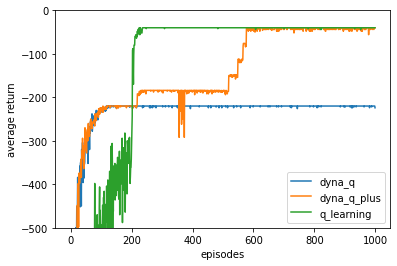

In [ ]:
simulation = 5
plt.plot(np.average([dyna_q() for i in range(simulation )],axis=0),label='dyna_q')
print('dyna_q')
plt.plot(np.average([dyna_q_plus() for i in range(simulation )],axis=0),label='dyna_q_plus')
print('dyna_q_plus')
plt.plot(np.average([q_learning() for i in range(simulation )],axis=0),label='q_learning')
print('q_learning')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

# Question 1(20%)
Why Q-learning can react instantly when environment change?

因為Q-learning的特點是會大膽地隨機拜訪狀態，可以接受失敗的機會，所以可以找到最佳策略，在探索和開發上比dynaQ來的好，因此在像這樣環境會改變中，會立即地做出反應。

而dynaQ的目的是為了加速Q-learning的學習速度，因此引入了模型學習的機制，儲存已拜訪過的狀態動作配對於模型中，會倚賴模型中的資料學習，因此使用dynaQ會讓agent只注意模型中儲存的狀態動作，而沒有察覺到牆壁開了一個洞後多出來的新路徑，而導致沒有比Q-learning更快速的反應。

#Useful tool

In [ ]:
from collections import defaultdict
import numpy as np
model0 = {} #dictionary
model0[5] = 1 #key:5 value:1
print("corresponding value at key 5", model0[5])
model = defaultdict(dict)


model[(0,1)][1] = [-1,(1,2)] #when key (0,1) is empty, model[(0,1)] will be dictionary, can represent s, a, r, s_
model[(0,1)][2] = [-1,(1,3)]
model[(1,1)][3] = [-1,(0,1)]
model[(1,1)][4] = [-1,(0,5)]
print("key in model:", list(model))
print("How many element in model:",len(model))
_ = np.random.permutation(list(model))
print("Permutation key of dict:",_)
s = _[0]
print("Random select one key:",s)
print("value in key:",model[tuple(s)])
print("Actions in model[tuple(s)]:",list(model[tuple(s)]))
a = list(model[tuple(s)])[0]

print("reward and next state in model[tuple(s)][a]:",model[tuple(s)][a])


corresponding value at key 5 1
key in model: [(0, 1), (1, 1)]
How many element in model: 2
Permutation key of dict: [[1 1]
 [0 1]]
Random select one key: [1 1]
value in key: {3: [-1, (0, 1)], 4: [-1, (0, 5)]}
Actions in model[tuple(s)]: [3, 4]
reward and next state in model[tuple(s)][a]: [-1, (0, 1)]
